# Example usage

Table of contents
1. pd
    - munging
        - `drop_by_cardinality`
        - `order_df`
        - `camelcase2snakecase`
    - viz
        - `display_corr_matrix`

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import dsgutils

## pd

### munging

#### `drop_by_cardinality`

In [3]:
# Create dataframe
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display(df)

,A,B,C,D
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


Drop by cardinality 0, will drop null columns

In [4]:
display_df = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0])
display(display_df)

,A,B,D
0,NaN,2,1
1,3.0,4,1
2,NaN,4,1


Drop by cardinality 0 and 1, will drop columns and columns with cardinality of 1

In [5]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display_df = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0, 1])
display(display_df)

,B
0,2
1,4
2,4


Return the values that have been dropped

In [6]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display_df, dropped = dsgutils.pd.munging.drop_by_cardinality(df, values_to_drop=[0, 1], return_dropped=True)
display(df)
print(dropped)

,B
0,2
1,4
2,4


{'C': 0, 'A': 1, 'D': 1}


#### `order_df`

In [7]:
# Create dataframe
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=list('ABCD'))

display(df)

,A,B,C,D
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


Bring `C` and `D` to front

In [8]:
display_df = dsgutils.pd.munging.order_df(df, first=['C', 'D'])
display(display_df)

,C,D,B,A
0,NaN,1,2,NaN
1,NaN,1,4,3.0
2,NaN,1,4,NaN


Put `C` in the end

In [9]:
display_df = dsgutils.pd.munging.order_df(df, last=['C'])
display(display_df)

,B,D,A,C
0,2,1,NaN,NaN
1,4,1,3.0,NaN
2,4,1,NaN,NaN


#### `camelcase2snake_case`

In [10]:
df = pd.DataFrame([[np.nan, 2, np.nan, 1], [3, 4, np.nan, 1],
                    [np.nan, 4, np.nan, 1]],
                  columns=['productID', 'StoreID', 'customerId', 'dayID'])

display(df)

,productID,StoreID,customerId,dayID
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


In [11]:
display_df = dsgutils.pd.munging.camelcase2snake_case(df)
display(display_df)

,product_id,store_id,customer_id,day_id
0,NaN,2,NaN,1
1,3.0,4,NaN,1
2,NaN,4,NaN,1


### viz

#### `display_df_info`

In [17]:
dsgutils.viz.display_df_info(df=df,
                             df_name='My DataFrame')

,a,b,c,d,e,f,g,h,i,j,String1,String2
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,A,B
1,-0.225462,-0.637943,-0.016286,1.044217,-1.084880,-2.205925,-0.951219,0.832973,-1.000208,0.343463,A,B
2,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497,-1.230374,0.205848,0.821371,-0.493780,A,B
3,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,-0.777376,-0.414635,-1.145641,0.325040,A,B
4,0.000594,1.418588,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,A,B
5,-1.094711,-1.654707,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,A,B
6,1.054113,-0.615562,0.437443,-2.809395,-0.653560,0.527787,0.932722,-0.111391,-1.120717,0.991136,A,B
7,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524,-0.292821,0.856582,A,B
8,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,0.604432,0.941819,A,B
9,-0.620143,0.814865,-0.900040,-0.480409,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,A,B


,Null counts,Data types,Unique values
a,0,float64,10
b,0,float64,10
c,0,float64,10
d,0,float64,10
e,0,float64,10
f,0,float64,10
g,0,float64,10
h,0,float64,10
i,0,float64,10
j,0,float64,10


#### `display_corr_matrix`

In [12]:
from string import ascii_letters

rs = np.random.RandomState(33)
df = pd.DataFrame(data=rs.normal(size=(10, 10)),
                 columns=list(ascii_letters[:10]))

df['String1'] = 'A'
df['String2'] = 'B'
display(df)

,a,b,c,d,e,f,g,h,i,j,String1,String2
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,A,B
1,-0.225462,-0.637943,-0.016286,1.044217,-1.084880,-2.205925,-0.951219,0.832973,-1.000208,0.343463,A,B
2,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497,-1.230374,0.205848,0.821371,-0.493780,A,B
3,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,-0.777376,-0.414635,-1.145641,0.325040,A,B
4,0.000594,1.418588,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,A,B
5,-1.094711,-1.654707,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,A,B
6,1.054113,-0.615562,0.437443,-2.809395,-0.653560,0.527787,0.932722,-0.111391,-1.120717,0.991136,A,B
7,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524,-0.292821,0.856582,A,B
8,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,0.604432,0.941819,A,B
9,-0.620143,0.814865,-0.900040,-0.480409,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,A,B


Display correlation matrix, only on chosen columns

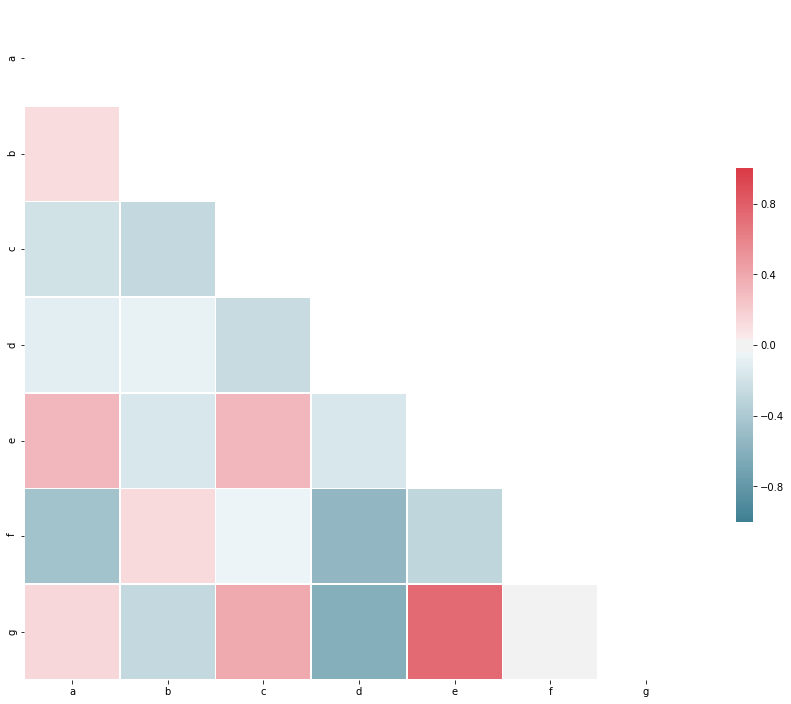

In [13]:
dsgutils.pd.viz.display_corr_matrix(df, on_columns=['a', 'b','c', 'd', 'e', 'f', 'g']);

Return the ax and put a title on it

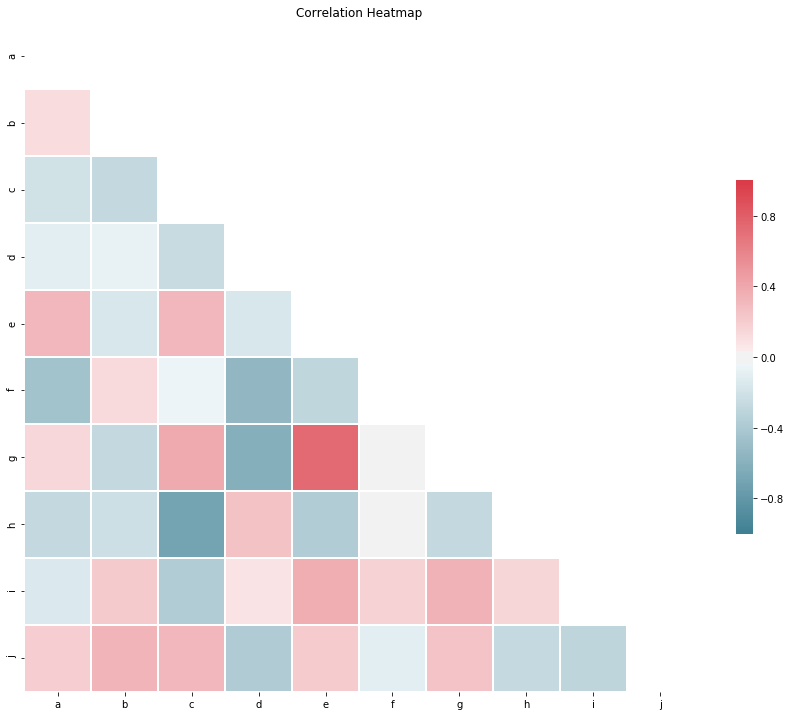

In [14]:
ax = dsgutils.pd.viz.display_corr_matrix(df, on_columns=list(ascii_letters[:10]))
ax.set_title('Correlation Heatmap');

Add a custom color map

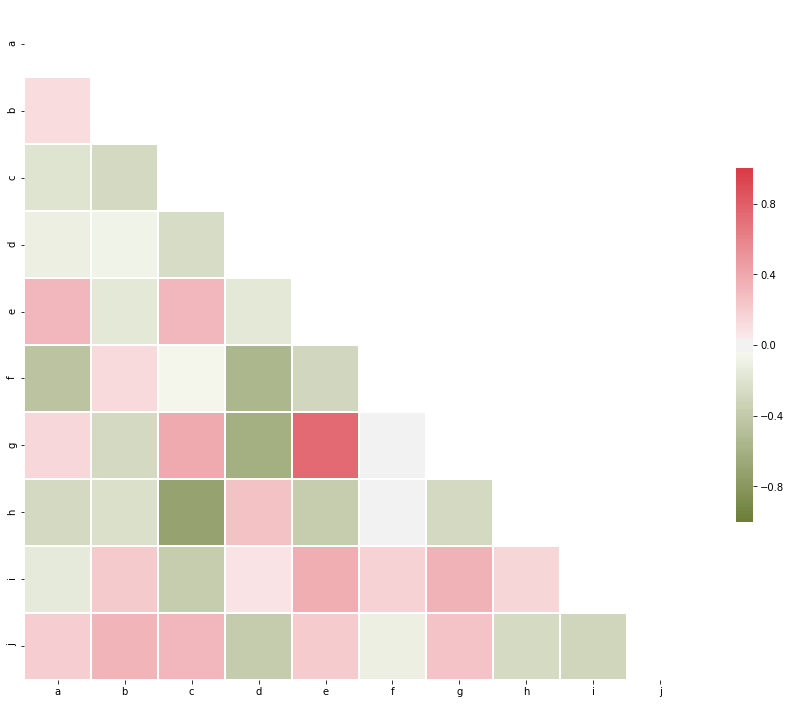

In [15]:
cmap = sns.diverging_palette(100, 10, as_cmap=True)
ax = dsgutils.pd.viz.display_corr_matrix(df, on_columns=list(ascii_letters[:10]), cmap=cmap);

#### `display_stacked_bar`

In [4]:
import string

In [11]:
main_column = list(string.ascii_uppercase[:5])  # A, B, C, D, E
stack_columns = list(string.ascii_lowercase[:3])

df = pd.DataFrame.from_dict({'Main': list(np.random.choice(main_column, 200, replace=True)),
                             'Stack': list(np.random.choice(stack_columns, 200, replace=True))})

In [12]:
df

,Main,Stack
0,A,b
1,E,a
2,E,a
3,E,b
4,B,c
5,A,c
6,E,a
7,B,c
8,D,a
9,E,b


Plot simple stacked bar plot

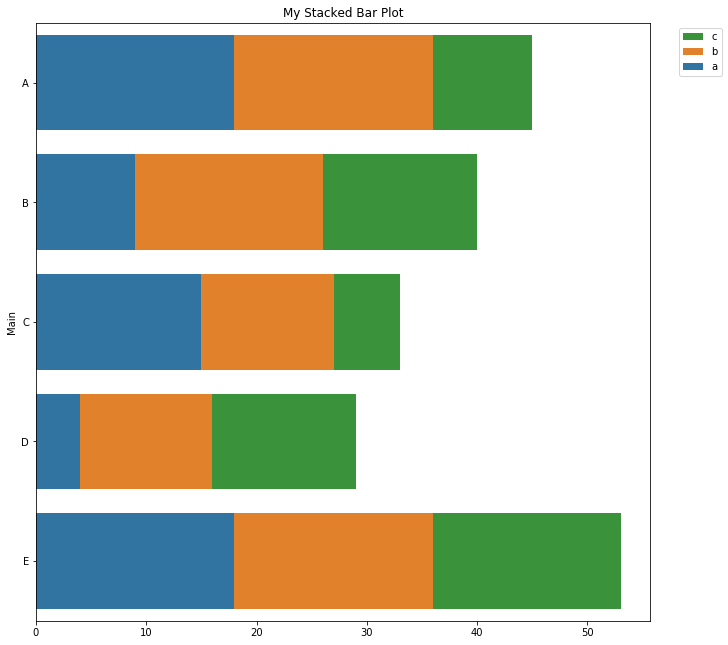

In [17]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack')
ax.set(title='My Stacked Bar Plot');

Same plot, but vertical

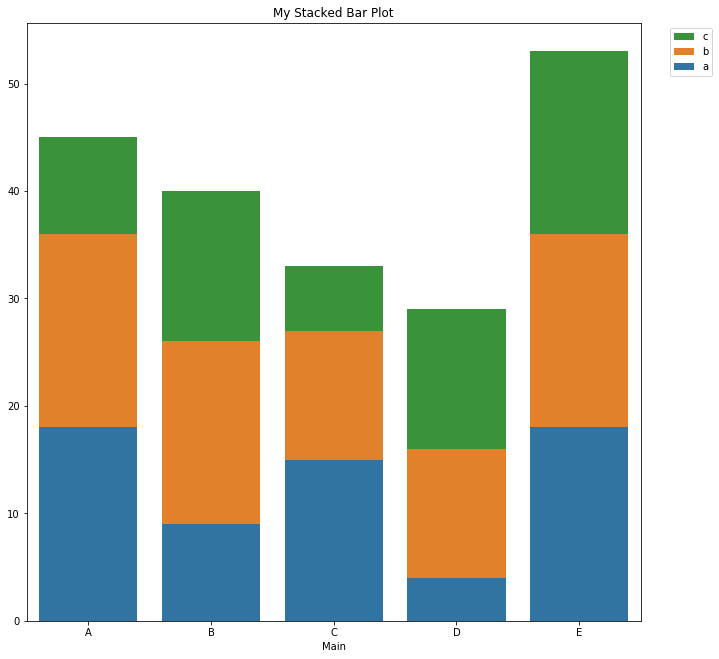

In [18]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False)
ax.set(title='My Stacked Bar Plot');

Plot the same barplot, but scale to a 100

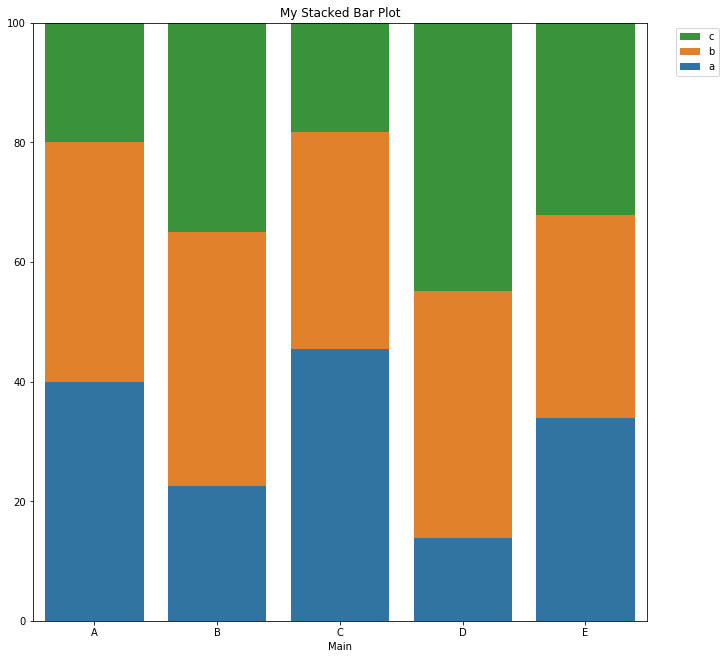

In [19]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False, unit=100)
ax.set(title='My Stacked Bar Plot');

Add your custum pallette

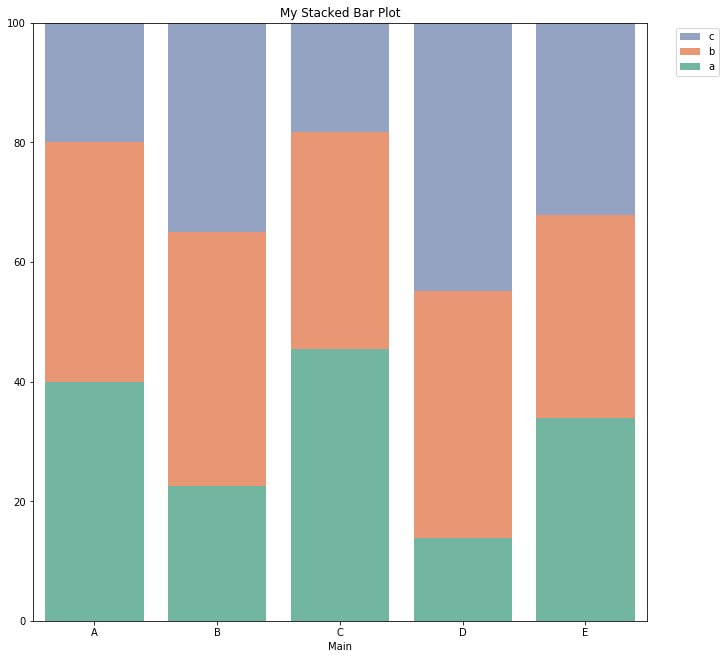

In [21]:
ax = dsgutils.pd.viz.display_stacked_cat_bar(df, groupby='Main', on='Stack', horizontal=False, unit=100, palette=sns.color_palette('Set2'))
ax.set(title='My Stacked Bar Plot');